In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyparsing import Forward

In [249]:
data=pd.read_csv("college_student_data.csv")
data.head(3)

,StudentID,Name,Gender,Age,Year,Department,IQ_Score,Daily_Study_Hours,MajorSubject1_Grade,MajorSubject2_Grade,MajorSubject3_Grade,MajorSubject4_Grade,Sports_Involvement,Expected_Result
0,S1001,Mia Brown,Male,20,Third,Business,123,1.5,B,C,D,D,No,1.22
1,S1002,Olivia Garcia,Female,20,Second,Science,123,3.7,E,C,A,A,Yes,3.01
2,S1003,Amelia Lee,Female,18,Second,Science,136,3.0,C,D,A,E,No,2.21


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentID            1000 non-null   object 
 1   Name                 1000 non-null   object 
 2   Gender               1000 non-null   object 
 3   Age                  1000 non-null   int64  
 4   Year                 1000 non-null   object 
 5   Department           1000 non-null   object 
 6   IQ_Score             1000 non-null   int64  
 7   Daily_Study_Hours    1000 non-null   float64
 8   MajorSubject1_Grade  1000 non-null   object 
 9   MajorSubject2_Grade  1000 non-null   object 
 10  MajorSubject3_Grade  1000 non-null   object 
 11  MajorSubject4_Grade  1000 non-null   object 
 12  Sports_Involvement   1000 non-null   object 
 13  Expected_Result      1000 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 109.5+ KB


In [251]:
data.duplicated().sum()

np.int64(0)

In [252]:
data.isnull().sum()

StudentID              0
Name                   0
Gender                 0
Age                    0
Year                   0
Department             0
IQ_Score               0
Daily_Study_Hours      0
MajorSubject1_Grade    0
MajorSubject2_Grade    0
MajorSubject3_Grade    0
MajorSubject4_Grade    0
Sports_Involvement     0
Expected_Result        0
dtype: int64

In [253]:
data.describe(
)

,Age,IQ_Score,Daily_Study_Hours,Expected_Result
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,20.938000,108.864000,3.515000,3.30164
std,2.041157,14.779375,1.466924,1.48281
min,18.000000,68.000000,1.000000,0.78000
25%,19.000000,98.000000,2.200000,2.02000
50%,21.000000,109.000000,3.500000,3.19000
75%,23.000000,119.000000,4.800000,4.43250
max,24.000000,154.000000,6.000000,7.47000


/tmp/ipykernel_52670/788841201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Daily_Study_Hours"])


<Axes: xlabel='Daily_Study_Hours', ylabel='Density'>

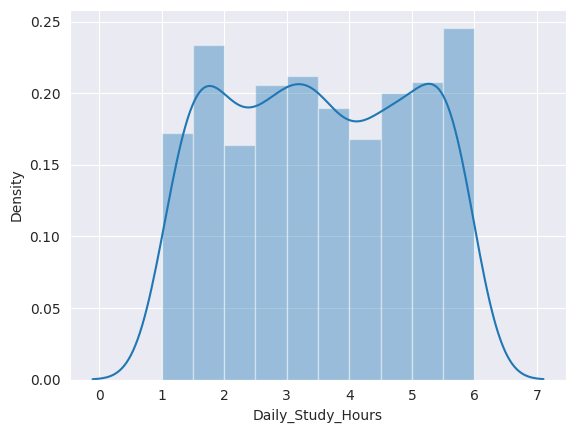

In [254]:
sns.distplot(data["Daily_Study_Hours"])

/tmp/ipykernel_52670/1298243121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

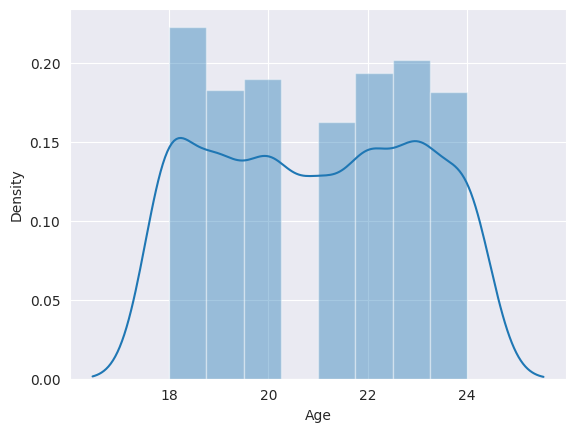

In [255]:
sns.distplot(data['Age'])

Now these two columns will be transformed into Normal Distribution

In [256]:
from sklearn.preprocessing import FunctionTransformer

In [257]:
ft=FunctionTransformer(np.log1p)

In [258]:
ft.fit(data['Daily_Study_Hours'])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [259]:
ft.transform(data['Daily_Study_Hours'])

0      0.916291
1      1.547563
2      1.386294
3      1.435085
4      1.280934
         ...   
995    1.704748
996    1.840550
997    1.757858
998    1.504077
999    0.832909
Name: Daily_Study_Hours, Length: 1000, dtype: float64

In [260]:
data['Daily_Study_Hours TF']=ft.transform(data['Daily_Study_Hours'])

/tmp/ipykernel_52670/3762982190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Daily_Study_Hours TF'])


<Axes: xlabel='Daily_Study_Hours TF', ylabel='Density'>

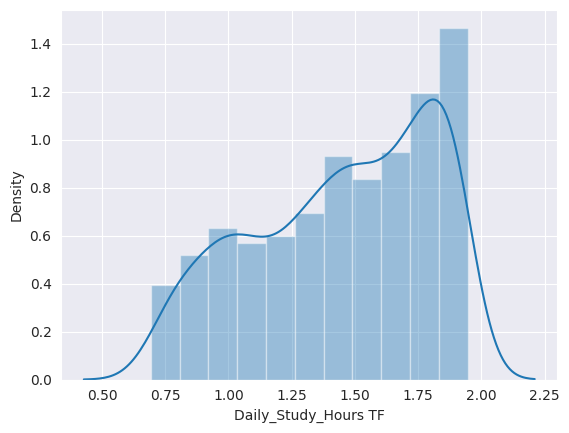

In [261]:
sns.distplot(data['Daily_Study_Hours TF'])

In [262]:
data

,StudentID,Name,Gender,Age,Year,Department,IQ_Score,Daily_Study_Hours,MajorSubject1_Grade,MajorSubject2_Grade,MajorSubject3_Grade,MajorSubject4_Grade,Sports_Involvement,Expected_Result,Daily_Study_Hours TF
0,S1001,Mia Brown,Male,20,Third,Business,123,1.5,B,C,D,D,No,1.22,0.916291
1,S1002,Olivia Garcia,Female,20,Second,Science,123,3.7,E,C,A,A,Yes,3.01,1.547563
2,S1003,Amelia Lee,Female,18,Second,Science,136,3.0,C,D,A,E,No,2.21,1.386294
3,S1004,Isabella Williams,Female,23,Fourth,Business,92,3.2,C,B,B,B,Yes,3.48,1.435085
4,S1005,Evelyn Martin,Female,23,First,Science,139,2.6,B,F,C,B,No,1.87,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1996,Mia Jackson,Female,23,Fourth,Science,104,4.5,D,C,E,D,No,4.33,1.704748
996,S1997,Liam Jones,Male,20,First,Business,100,5.3,D,C,B,A,No,5.30,1.840550
997,S1998,Aiden Williams,Female,21,Fourth,Engineering,113,4.8,B,C,D,A,Yes,4.25,1.757858
998,S1999,Evelyn Johnson,Female,19,Third,Science,124,3.5,A,C,F,D,Yes,2.82,1.504077


# Scalling for IQ Score

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
ss=StandardScaler()

In [265]:
ss.fit(data[['IQ_Score']])

,copy,True
,with_mean,True
,with_std,True


In [266]:
ss.transform(data[['IQ_Score']])

array([[ 0.95694663],
       [ 0.95694663],
       [ 1.83699092],
       [-1.14162054],
       [ 2.04007806],
       [ 0.48307662],
       [ 1.49851234],
       [-0.26157624],
       [ 1.2954252 ],
       [-0.87083768],
       [ 1.22772948],
       [-0.46466339],
       [-0.19388053],
       [-0.0584891 ],
       [ 0.27998948],
       [-1.54779482],
       [ 0.07690233],
       [ 0.88925091],
       [-1.00622911],
       [ 0.8215552 ],
       [ 0.75385948],
       [ 0.21229376],
       [ 0.14459805],
       [-0.32927196],
       [-0.39696767],
       [ 0.41538091],
       [-0.12618481],
       [ 1.22772948],
       [-0.39696767],
       [ 0.07690233],
       [ 1.43081663],
       [ 0.8215552 ],
       [ 0.61846805],
       [-1.34470768],
       [ 1.09233805],
       [-0.12618481],
       [-1.75088197],
       [ 0.8215552 ],
       [-0.32927196],
       [-0.5323591 ],
       [-0.39696767],
       [-0.66775053],
       [ 0.75385948],
       [-0.5323591 ],
       [ 0.00920662],
       [ 0

In [267]:
data['IQ_Score']=ss.transform(data[['IQ_Score']])

In [268]:
data

,StudentID,Name,Gender,Age,Year,Department,IQ_Score,Daily_Study_Hours,MajorSubject1_Grade,MajorSubject2_Grade,MajorSubject3_Grade,MajorSubject4_Grade,Sports_Involvement,Expected_Result,Daily_Study_Hours TF
0,S1001,Mia Brown,Male,20,Third,Business,0.956947,1.5,B,C,D,D,No,1.22,0.916291
1,S1002,Olivia Garcia,Female,20,Second,Science,0.956947,3.7,E,C,A,A,Yes,3.01,1.547563
2,S1003,Amelia Lee,Female,18,Second,Science,1.836991,3.0,C,D,A,E,No,2.21,1.386294
3,S1004,Isabella Williams,Female,23,Fourth,Business,-1.141621,3.2,C,B,B,B,Yes,3.48,1.435085
4,S1005,Evelyn Martin,Female,23,First,Science,2.040078,2.6,B,F,C,B,No,1.87,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1996,Mia Jackson,Female,23,Fourth,Science,-0.329272,4.5,D,C,E,D,No,4.33,1.704748
996,S1997,Liam Jones,Male,20,First,Business,-0.600055,5.3,D,C,B,A,No,5.30,1.840550
997,S1998,Aiden Williams,Female,21,Fourth,Engineering,0.279989,4.8,B,C,D,A,Yes,4.25,1.757858
998,S1999,Evelyn Johnson,Female,19,Third,Science,1.024642,3.5,A,C,F,D,Yes,2.82,1.504077


# Now the ENCODING will perform.
.....Will use One Encoder for Sports Involvment and Gender Section

In [269]:
from sklearn.preprocessing import OneHotEncoder

In [270]:
ohe=OneHotEncoder(drop='first')

In [271]:
ohe.fit(data[['Sports_Involvement']])

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [272]:
SI=ohe.transform(data[['Sports_Involvement']]).toarray()
SI

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [273]:
data['Sports_Involvement']=SI

In [274]:
OHE=OneHotEncoder(drop='first')

In [275]:
OHE.fit(data[['Gender']])

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [276]:
G_TF=(OHE.transform(data[['Gender']]).toarray())
G_TF

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 0.]], shape=(1000, 2))

In [277]:
data[('Gender_Male')]=G_TF[:,0]

In [278]:
data.drop(columns=['Gender'],inplace=True)

In [279]:
data

,StudentID,Name,Age,Year,Department,IQ_Score,Daily_Study_Hours,MajorSubject1_Grade,MajorSubject2_Grade,MajorSubject3_Grade,MajorSubject4_Grade,Sports_Involvement,Expected_Result,Daily_Study_Hours TF,Gender_Male
0,S1001,Mia Brown,20,Third,Business,0.956947,1.5,B,C,D,D,0.0,1.22,0.916291,1.0
1,S1002,Olivia Garcia,20,Second,Science,0.956947,3.7,E,C,A,A,1.0,3.01,1.547563,0.0
2,S1003,Amelia Lee,18,Second,Science,1.836991,3.0,C,D,A,E,0.0,2.21,1.386294,0.0
3,S1004,Isabella Williams,23,Fourth,Business,-1.141621,3.2,C,B,B,B,1.0,3.48,1.435085,0.0
4,S1005,Evelyn Martin,23,First,Science,2.040078,2.6,B,F,C,B,0.0,1.87,1.280934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1996,Mia Jackson,23,Fourth,Science,-0.329272,4.5,D,C,E,D,0.0,4.33,1.704748,0.0
996,S1997,Liam Jones,20,First,Business,-0.600055,5.3,D,C,B,A,0.0,5.30,1.840550,1.0
997,S1998,Aiden Williams,21,Fourth,Engineering,0.279989,4.8,B,C,D,A,1.0,4.25,1.757858,0.0
998,S1999,Evelyn Johnson,19,Third,Science,1.024642,3.5,A,C,F,D,1.0,2.82,1.504077,0.0


# Using Label Encoder for Names and Students ID

In [280]:
from sklearn.preprocessing import LabelEncoder

In [281]:
le=LabelEncoder()

In [282]:
le.fit(data['Name'])

LabelEncoder()

In [283]:
df=pd.DataFrame(le.transform(data['Name']))
df

,0
0,277
1,336
2,29
3,199
4,158
...,...
995,282
996,228
997,18
998,154


In [284]:
data['Name']=df

In [285]:
le.fit(data['StudentID'])

LabelEncoder()

In [286]:
df2=pd.DataFrame(le.transform(data['StudentID']))
df2

,0
0,0
1,1
2,2
3,3
4,4
...,...
995,995
996,996
997,997
998,998


In [287]:
data['StudentID']=df2

In [288]:
data

,StudentID,Name,Age,Year,Department,IQ_Score,Daily_Study_Hours,MajorSubject1_Grade,MajorSubject2_Grade,MajorSubject3_Grade,MajorSubject4_Grade,Sports_Involvement,Expected_Result,Daily_Study_Hours TF,Gender_Male
0,0,277,20,Third,Business,0.956947,1.5,B,C,D,D,0.0,1.22,0.916291,1.0
1,1,336,20,Second,Science,0.956947,3.7,E,C,A,A,1.0,3.01,1.547563,0.0
2,2,29,18,Second,Science,1.836991,3.0,C,D,A,E,0.0,2.21,1.386294,0.0
3,3,199,23,Fourth,Business,-1.141621,3.2,C,B,B,B,1.0,3.48,1.435085,0.0
4,4,158,23,First,Science,2.040078,2.6,B,F,C,B,0.0,1.87,1.280934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,282,23,Fourth,Science,-0.329272,4.5,D,C,E,D,0.0,4.33,1.704748,0.0
996,996,228,20,First,Business,-0.600055,5.3,D,C,B,A,0.0,5.30,1.840550,1.0
997,997,18,21,Fourth,Engineering,0.279989,4.8,B,C,D,A,1.0,4.25,1.757858,0.0
998,998,154,19,Third,Science,1.024642,3.5,A,C,F,D,1.0,2.82,1.504077,0.0


# Ordinal Encoding will be used for Department, Year and Grades Section

In [289]:
data['Department'].unique()

array(['Business', 'Science', 'Arts', 'Engineering'], dtype=object)

In [292]:
data['Year'].unique()

array(['Third', 'Second', 'Fourth', 'First'], dtype=object)

In [298]:
data['MajorSubject1_Grade'].unique()

In [331]:
dep=[['Business', 'Science', 'Arts', 'Engineering']]
year=[['Third', 'Second', 'Fourth', 'First']]
grade=[['B', 'E', 'C', 'A', 'D', 'F']]

In [301]:
from sklearn.preprocessing import OrdinalEncoder

In [328]:
oe=OrdinalEncoder(categories=dep)
major=pd.DataFrame(data['MajorSubject1_Grade'])
major2=pd.DataFrame(data['MajorSubject2_Grade'])
major3=pd.DataFrame(data['MajorSubject3_Grade'])
major4=pd.DataFrame(data['MajorSubject4_Grade'])
Depart=pd.DataFrame(data['Department'])
yr=pd.DataFrame(data['Year'])

In [315]:
oe.fit(Depart)

,categories,"[['Business', 'Science', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [317]:
oe.transform(Depart)

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [3.],
       [2.],
       [3.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.],
       [3.],
       [1.],
       [2.],
       [3.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [3.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],

In [321]:
data['Department']=oe.transform(Depart)

In [318]:
oe1=OrdinalEncoder(categories=year)

In [319]:
oe1.fit(yr)

,categories,"[['Third', 'Second', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [320]:
oe1.transform(yr)

array([[0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [3.],
       [2.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [1.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],
       [3.],
       [2.],
       [3.],
       [1.],
       [0.],
       [0.],
       [2.],
       [3.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [3.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [3.],
       [2.],
       [3.],
       [1.],
       [0.],

In [322]:
data['Year']=oe1.transform(yr)

In [335]:
oe2=OrdinalEncoder(categories=grade)

In [341]:
oe2.fit(major)

,categories,"[['B', 'E', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [343]:
oe2.transform(major)

array([[0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [3.],
       [2.],
       [4.],
       [2.],
       [0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [5.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [2.],
       [2.],
       [0.],
       [3.],
       [2.],
       [0.],
       [2.],
       [4.],
       [2.],
       [5.],
       [2.],
       [1.],
       [2.],
       [5.],
       [3.],
       [0.],
       [5.],
       [2.],
       [2.],
       [1.],
       [3.],
       [0.],
       [4.],
       [3.],
       [0.],
       [2.],
       [2.],
       [5.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [2.],
       [3.],
       [1.],
       [0.],
       [2.],
       [4.],
       [0.],
       [4.],
       [3.],
       [3.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [4.],
       [0.],
       [3.],
       [3.],
       [4.],

In [344]:
data['MajorSubject1_Grade']=oe2.transform(major)

In [345]:
oe2.fit(major2)

,categories,"[['B', 'E', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [346]:
oe2.transform(major2)

array([[2.],
       [2.],
       [4.],
       [0.],
       [5.],
       [3.],
       [1.],
       [3.],
       [0.],
       [4.],
       [0.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [4.],
       [2.],
       [0.],
       [4.],
       [5.],
       [3.],
       [2.],
       [0.],
       [2.],
       [4.],
       [3.],
       [4.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [3.],
       [0.],
       [1.],
       [5.],
       [3.],
       [3.],
       [0.],
       [5.],
       [3.],
       [2.],
       [0.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [2.],
       [4.],
       [1.],
       [0.],
       [4.],
       [2.],
       [4.],
       [0.],
       [0.],
       [1.],

In [348]:
data['MajorSubject2_Grade']=oe2.transform(major2)

In [349]:
oe2.fit(major3)

,categories,"[['B', 'E', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [350]:
oe2.transform(major3)

array([[4.],
       [3.],
       [3.],
       [0.],
       [2.],
       [0.],
       [2.],
       [5.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [4.],
       [4.],
       [2.],
       [5.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [5.],
       [1.],
       [0.],
       [4.],
       [1.],
       [4.],
       [2.],
       [4.],
       [0.],
       [4.],
       [5.],
       [0.],
       [0.],
       [1.],
       [5.],
       [2.],
       [0.],
       [4.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [4.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [4.],
       [0.],
       [5.],
       [2.],
       [2.],
       [4.],
       [2.],
       [4.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [3.],
       [0.],
       [0.],
       [0.],

In [351]:
data['MajorSubject3_Grade']=oe2.transform(major3)

In [352]:
oe2.fit(major3)

,categories,"[['B', 'E', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [353]:
oe2.transform(major3)

array([[4.],
       [3.],
       [3.],
       [0.],
       [2.],
       [0.],
       [2.],
       [5.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [4.],
       [4.],
       [2.],
       [5.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [5.],
       [1.],
       [0.],
       [4.],
       [1.],
       [4.],
       [2.],
       [4.],
       [0.],
       [4.],
       [5.],
       [0.],
       [0.],
       [1.],
       [5.],
       [2.],
       [0.],
       [4.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [4.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [4.],
       [0.],
       [5.],
       [2.],
       [2.],
       [4.],
       [2.],
       [4.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [3.],
       [0.],
       [0.],
       [0.],

In [354]:
data['MajorSubject4_Grade']=oe2.transform(major3)

In [355]:
data

,StudentID,Name,Age,Year,Department,IQ_Score,Daily_Study_Hours,MajorSubject1_Grade,MajorSubject2_Grade,MajorSubject3_Grade,MajorSubject4_Grade,Sports_Involvement,Expected_Result,Daily_Study_Hours TF,Gender_Male
0,0,277,20,0.0,0.0,0.956947,1.5,0.0,2.0,4.0,4.0,0.0,1.22,0.916291,1.0
1,1,336,20,1.0,1.0,0.956947,3.7,1.0,2.0,3.0,3.0,1.0,3.01,1.547563,0.0
2,2,29,18,1.0,1.0,1.836991,3.0,2.0,4.0,3.0,3.0,0.0,2.21,1.386294,0.0
3,3,199,23,2.0,0.0,-1.141621,3.2,2.0,0.0,0.0,0.0,1.0,3.48,1.435085,0.0
4,4,158,23,3.0,1.0,2.040078,2.6,0.0,5.0,2.0,2.0,0.0,1.87,1.280934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,282,23,2.0,1.0,-0.329272,4.5,4.0,2.0,1.0,1.0,0.0,4.33,1.704748,0.0
996,996,228,20,3.0,0.0,-0.600055,5.3,4.0,2.0,0.0,0.0,0.0,5.30,1.840550,1.0
997,997,18,21,2.0,3.0,0.279989,4.8,0.0,2.0,4.0,4.0,1.0,4.25,1.757858,0.0
998,998,154,19,0.0,1.0,1.024642,3.5,3.0,2.0,5.0,5.0,1.0,2.82,1.504077,0.0


In [360]:
x= data.iloc[:,:-1]
y= data['Expected_Result']

In [376]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [373]:
lg=LinearRegression()

In [410]:
Sfs=SequentialFeatureSelector(lg,k_features=2,forward=True)
Sfs

,estimator,LinearRegression()
,k_features,2
,forward,True
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [411]:
Sfs.fit(x,y)

,estimator,LinearRegression()
,k_features,"(2, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'r2'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [412]:
Sfs.feature_names

['StudentID',
 'Name',
 'Age',
 'Year',
 'Department',
 'IQ_Score',
 'Daily_Study_Hours',
 'MajorSubject1_Grade',
 'MajorSubject2_Grade',
 'MajorSubject3_Grade',
 'MajorSubject4_Grade',
 'Sports_Involvement',
 'Expected_Result',
 'Daily_Study_Hours TF']

In [413]:
Sfs.k_feature_names_

('StudentID', 'Expected_Result')

In [414]:
Sfs.k_score_

np.float64(1.0)